# Experiment: Comprehensive Analysis of Video Game Sales Data - take #190890237894

The aim of the game is to be able to predict video game sales.

To do this I am going to use a Kaggle dataset on video game sales over the last few years.

The first question I need to answer is which features are relevant in trying to predict video game sales.

Once I have identified all the relevant features from the data set, I will then test various machine learning algorithms to predict video game sales.

## First things first, let's take a look at the data


In [1]:
## Importing the data using pandas and taking a look at the first few rows.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

video_games_raw = pd.read_csv('vgsales.csv')

In [2]:
video_games_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
## Just to understand a little more about the data

video_games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Let me understand the column types

video_games_raw.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
## Before going any further I just want to remove any duplicate values that may cause trouble later.
## I am not going to remove any NaN values just yet in case I remove a row with value but will do this later.

video_games_raw.drop_duplicates(inplace=True)

In [6]:
video_games_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


I can see from the head function that the video games are ranked in the data set by total global sales. The dataset also contains information about the game name, genre, platform and sales in different regions.

Before I identify which are the most relevant features, I want to try to understand the overview of the sales column metrics and try a couple of visualisations.


In [7]:
## Let's describe the various sales columns

print(video_games_raw['NA_Sales'].describe())
print(video_games_raw['EU_Sales'].describe())
print(video_games_raw['JP_Sales'].describe())
print(video_games_raw['Other_Sales'].describe())
print(video_games_raw['Global_Sales'].describe())

## What about percentage of total sales? I think it's worth adding that column just to see

video_games_raw['Percent_Total_Sales'] = (video_games_raw['Global_Sales']/(video_games_raw['Global_Sales'].sum()))*100


count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64
count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64
count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64
count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64
count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.

In [8]:
## Just want to check my column was created successfully

video_games_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Percent_Total_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.927533
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.451099
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.401550
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.369937
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.351664


Interesting. The US sales represent the highest percentage of total sales, when you look at the max values and sum in describe, therefore it is likely that US sales are a good indicator of Global Sales. 

I wonder if any other factors come into play. 

In [9]:
## Let's create a new dataframe with just some of the data.

video_games_platform = video_games_raw.loc[:,['Platform','Year','Publisher','Global_Sales']]

In [10]:
video_games_platform.head()

,Platform,Year,Publisher,Global_Sales
0,Wii,2006.0,Nintendo,82.74
1,NES,1985.0,Nintendo,40.24
2,Wii,2008.0,Nintendo,35.82
3,Wii,2009.0,Nintendo,33.00
4,GB,1996.0,Nintendo,31.37


In [11]:
## Thinking about how to create a chart showing percentage of sales by Year by Platform

/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


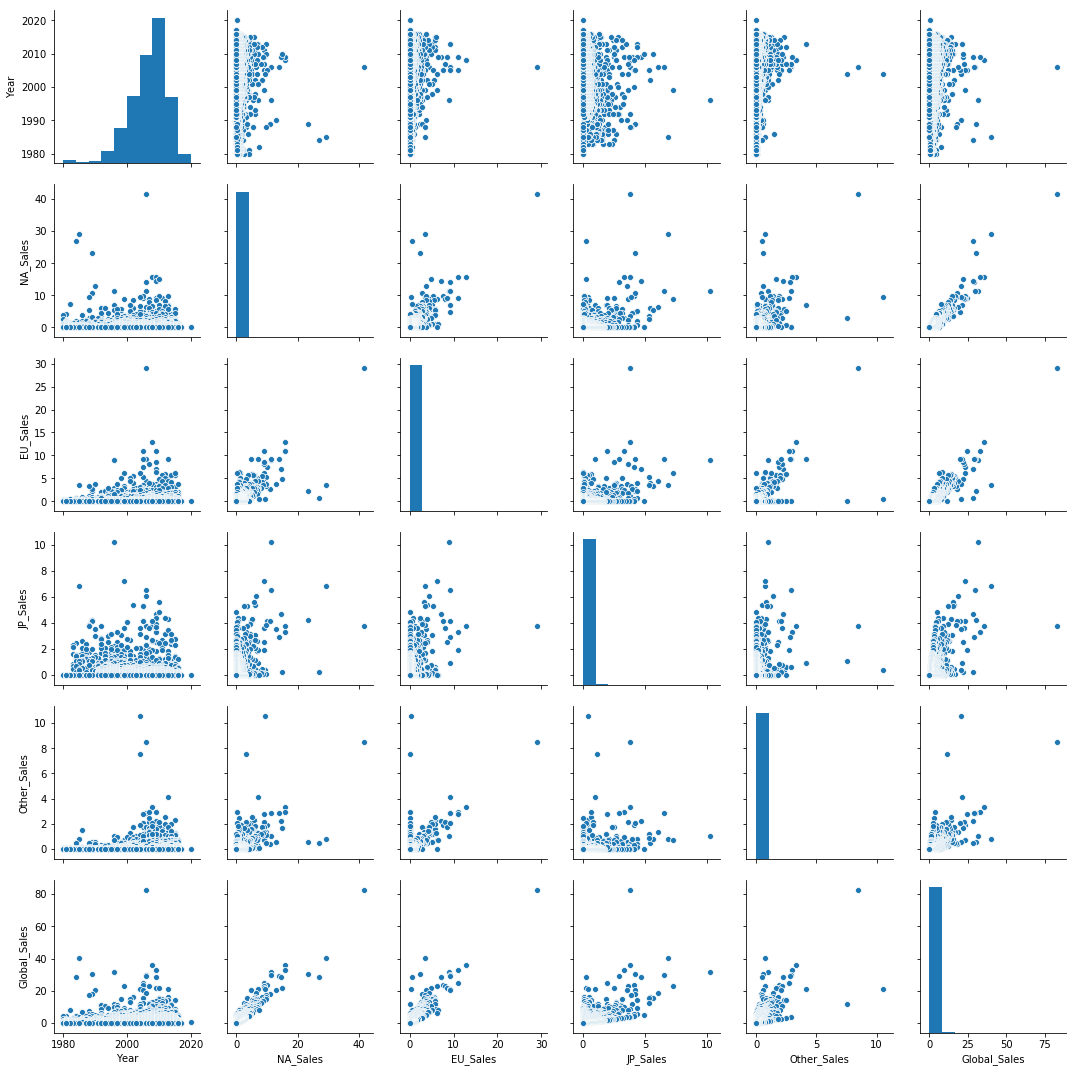

In [12]:
## I'm also going to create one with just numeric variables 

video_games_sales = video_games_raw.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

sns.pairplot(video_games_sales)

Ok so it seems like no one year or market is really jumping out in the plots of sales data.

Let me take a look at some of the other factors. I am interested to understand the impact of Platform, Year and Genre on sales.

First let's look at platform.

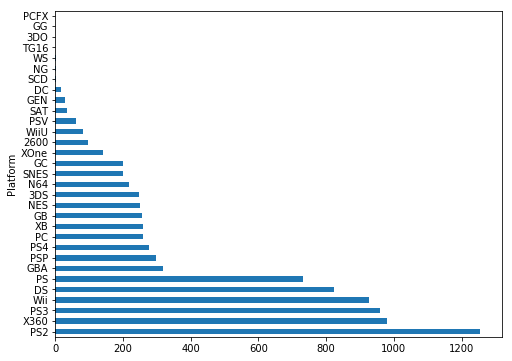

In [13]:
plt.figure(figsize=(8,6))
platform_sales = video_games_raw.groupby('Platform').Global_Sales.sum().sort_values(ascending=False)
platform_sales.plot.barh()
plt.ylabel = "Platform"
plt.xlabel = "Total Sales"
plt.show()

Ok so it looks like there are some clear winners when it comes to more popular platforms. 

I wonder if the sales change by year.

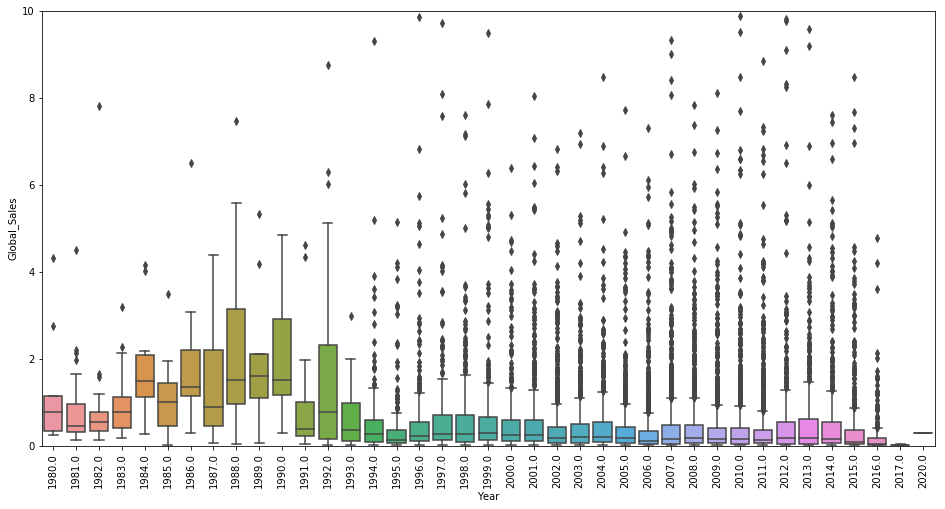

In [14]:
data = pd.concat([video_games_raw['Global_Sales'], video_games_raw['Year']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Year', y="Global_Sales", data=data)
fig.axis(ymin=0, ymax=10);
plt.xticks(rotation=90);

Ok that's interesting. It seems as though the average sales of games are converging as time goes on however there are a lot of outliers with higher sales, especially from 1996 onwards. I wonder what is happening here.

Before we move onto looking into the impact of Genre, I want to explore this in more detail.

In [15]:
## Step 1: How many games were released each year?

video_games_raw['Year'].value_counts(dropna=False).sort_values(ascending=False)

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
NaN        271
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [16]:
## Calculate sales/Game released

games_released = video_games_raw.groupby('Year').count()['Name']
sales = video_games_raw.groupby('Year').sum()[['Global_Sales']]
sales_per_game = pd.concat([sales, games_released], axis=1, keys=['Sales', 'Games Released'])

print(sales_per_game)

              Sales Games Released
       Global_Sales           Name
Year                              
1980.0        11.38              9
1981.0        35.77             46
1982.0        28.86             36
1983.0        16.79             17
1984.0        50.36             14
1985.0        53.94             14
1986.0        37.07             21
1987.0        21.74             16
1988.0        47.22             15
1989.0        73.45             17
1990.0        49.39             16
1991.0        32.23             41
1992.0        76.16             43
1993.0        45.98             60
1994.0        79.17            121
1995.0        88.11            219
1996.0       199.15            263
1997.0       200.98            289
1998.0       256.47            379
1999.0       251.27            338
2000.0       201.56            349
2001.0       331.47            482
2002.0       395.52            829
2003.0       357.85            775
2004.0       419.31            763
2005.0       459.94 

Ok so it is clear to me that there was a significant increase in the total number of video games released per year between 1994 and 2016. This peaked in 2008/9. The trend is matched by the global sales.

However, sales per game did not increase. Perhaps people were overwhelmed by choice making it more difficult for any games to sell more than others.

I think this is interesting and worth digging into further.

Let's look at this in more detail.

Are there any types of games that do especially well?

* Test platform sales by year - see if it changes
* Look at max and min sales/ game by year - see if that changes and then look at which Games stand out.

In [17]:
## First let's groupby year, I need to remove Name and then group.

vid_by_year = video_games_raw.drop(['Name'], axis=1)

vid_sales_by_year = vid_by_year.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]


In [18]:
vid_sales_by_year.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


In [19]:
vid_sales_by_year.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,111.113590,61.772308,32.930769,20.231026,226.163077
std,107.844147,63.745250,21.225250,25.064911,212.350318
min,0.000000,0.000000,0.000000,0.000000,0.050000
25%,24.345000,4.300000,14.670000,0.905000,46.600000
50%,86.760000,47.260000,34.200000,7.750000,199.150000
75%,183.785000,114.260000,50.890000,38.820000,365.825000
max,351.440000,191.590000,73.730000,82.390000,678.900000


In [20]:
vid_sales_by_platform = vid_by_year.groupby(['Year','Platform']).sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

In [21]:
vid_sales_by_platform

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year   Platform                                                         
1980.0 2600         10.59      0.67      0.00         0.12         11.38
1981.0 2600         33.40      1.96      0.00         0.32         35.77
1982.0 2600         26.92      1.65      0.00         0.31         28.86
1983.0 2600          5.44      0.34      0.00         0.06          5.83
       NES           2.32      0.46      8.10         0.08         10.96
1984.0 2600          0.26      0.01      0.00         0.00          0.27
       NES          33.02      2.09     14.27         0.70         50.09
1985.0 2600          0.42      0.03      0.00         0.00          0.45
       DS            0.00      0.00      0.02         0.00          0.02
       NES          33.31      4.68     14.54         0.91         53.44
       PC            0.00      0.03      0.00         0.01          0.03
1986.0 2600          0.63      0.04      0.00         0.00          0.66
       NES          11.87      2.80     19.81         1.93         36.41
1987.0 2600          1.84      0.09      0.00         0.01          1.98
       NES           6.62      1.32     11.63         0.19         19.76
1988.0 2600          0.69      0.04      0.00         0.01          0.75
       GB            0.82      0.23      0.35         0.03          1.43
       NES          22.36      6.30     15.41         0.94         45.01
       PC            0.00      0.02      0.00         0.01          0.03
1989.0 2600          0.59      0.03      0.00         0.01          0.62
       GB           39.81      7.60     16.16         1.40         64.98
       NES           4.75      0.81      2.20         0.09          7.85
1990.0 GB            2.24      0.89      1.33         0.43          4.89
       GEN           1.86      0.55      0.11         0.08          2.60
       NES           6.08      1.59      7.84         0.22         15.74
       SNES         15.28      4.60      5.60         0.67         26.16
1991.0 GB            1.43      0.68      3.38         0.08          5.57
       GEN           3.03      0.91      0.26         0.13          4.34
       NES           2.83      0.52      2.60         0.16          6.11
       SNES          5.47      1.84      8.54         0.37         16.21
...                   ...       ...       ...          ...           ...
2014.0 PC            3.40      8.62      0.00         1.31         13.39
       PS3          16.12     20.57      6.23         8.05         50.96
       PS4          34.09     44.80      2.92        17.02         98.76
       PSP           0.00      0.00      0.24         0.00          0.24
       PSV           3.21      3.48      6.05         2.01         14.74
       Wii           1.82      2.25      0.00         0.36          4.44
       WiiU         10.78      6.49      3.16         2.11         22.51
       X360         20.09     13.08      0.08         3.18         36.42
       XOne         30.41     17.75      0.14         4.14         52.43
2015.0 3DS           5.82      4.77     15.39         0.99         26.99
       PC            2.20      5.28      0.00         0.55          8.07
       PS3           4.76      7.43      3.67         2.35         18.22
       PS4          40.76     50.43      6.19        17.86        115.30
       PSP           0.00      0.00      0.12         0.00          0.12
       PSV           0.54      1.28      4.77         0.48          7.10
       Wii           0.57      0.87      0.00         0.12          1.55
       WiiU          6.77      4.90      3.41         1.29         16.38
       X360          7.11      4.77      0.00         1.14         13.05
       XOne         34.29     17.98      0.17         5.23         57.66
2016.0 3DS           0.83      0.57      5.03         0.12          6.60
       PC            0.84      1.59      0.00         0.17          2.60
       PS3           0.40      0.80      1.13         0.22          2.59
  

In [22]:
vid_sales_by_platform.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,241.000000,241.000000,241.000000,241.000000,241.000000
mean,17.981037,9.996349,5.329046,3.273900,36.599004
std,25.173846,14.797152,7.444783,5.846089,48.708841
min,0.000000,0.000000,0.000000,0.000000,0.020000
25%,0.820000,0.420000,0.040000,0.080000,3.290000
50%,6.390000,3.480000,1.950000,0.630000,14.740000
75%,26.980000,11.780000,8.100000,3.050000,50.090000
max,116.540000,65.270000,38.560000,39.850000,211.780000


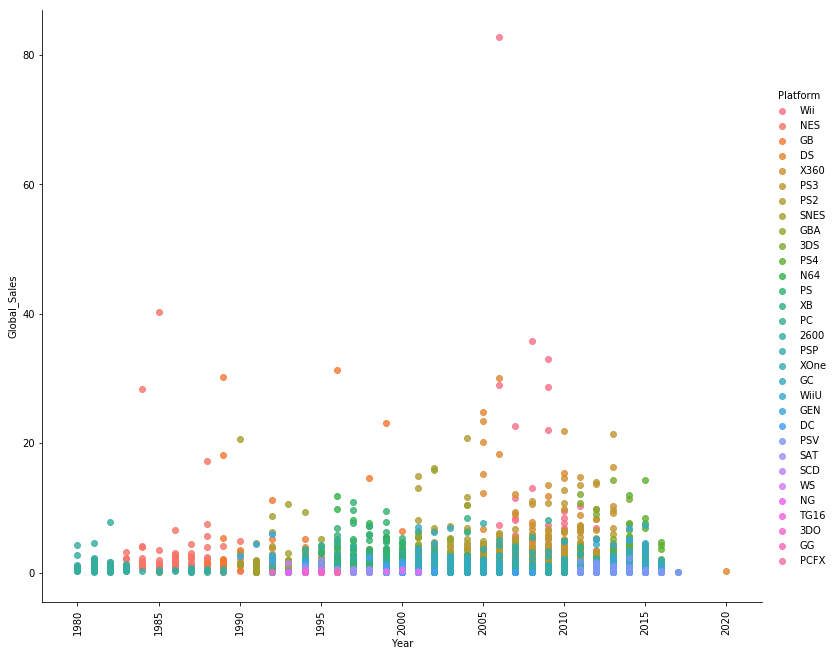

In [23]:
## Understand sales by year and platform
fig = sns.lmplot('Year', 'Global_Sales', data=video_games_raw, hue='Platform', height=9, aspect=1.2, fit_reg=False)
plt.xticks(rotation=90);

plt.show()

Ok the final thing I want to look at before checking all features together is Genre.

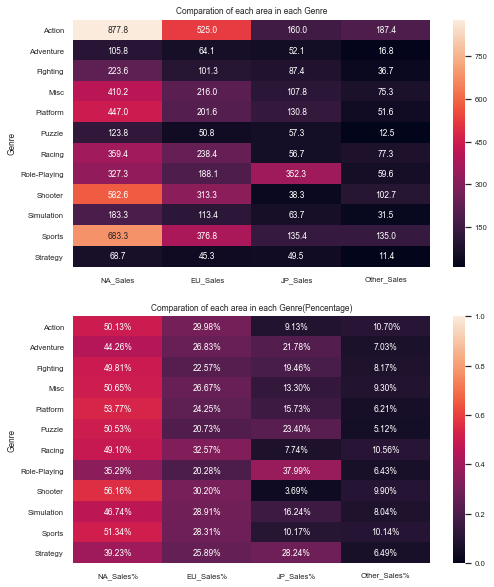

In [24]:
GenreGroup = video_games_raw.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

In [25]:
print(GenreGroup)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Genre                                                                   
Action          877.83    525.00    159.95       187.38       1751.18   
Adventure       105.80     64.13     52.07        16.81        239.04   
Fighting        223.59    101.32     87.35        36.68        448.91   
Misc            410.24    215.98    107.76        75.32        809.96   
Platform        447.05    201.63    130.77        51.59        831.37   
Puzzle          123.78     50.78     57.31        12.55        244.95   
Racing          359.42    238.39     56.69        77.27        732.04   
Role-Playing    327.28    188.06    352.31        59.61        927.37   
Shooter         582.60    313.27     38.28       102.69       1037.37   
Simulation      183.31    113.38     63.70        31.52        392.20   
Sports          683.35    376.85    135.37       134.97       1330.93   
Strategy         68.70     45.34     49.46        1

In [26]:
PlatformGroup = video_games_raw.groupby(['Platform']).sum().loc[:, 'NA_Sales':'Global_Sales']

In [27]:
print(PlatformGroup)

          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
2600         90.60      5.47      0.00         0.91         97.08
3DO           0.00      0.00      0.10         0.00          0.10
3DS          78.87     58.52     97.35        12.63        247.46
DC            5.43      1.69      8.56         0.27         15.97
DS          390.71    194.65    175.57        60.53        822.49
GB          114.32     47.82     85.12         8.20        255.45
GBA         187.54     75.25     47.33         7.73        318.50
GC          133.46     38.71     21.58         5.18        199.36
GEN          19.27      5.52      2.67         0.89         28.36
GG            0.00      0.00      0.04         0.00          0.04
N64         139.02     41.06     34.22         4.38        218.88
NES         125.94     21.15     98.65         5.31        251.07
NG            0.00      0.00      1.44         0.00          1.44
PC        

One important thing before my final correlation plots is to remove the rank column as it is related directly to sales and could skew any results seen.

In [28]:
video_games_corr = video_games_raw.drop(['Rank','Name','Percent_Total_Sales'], axis=1)

video_games_corr = video_games_corr.groupby(['Platform']).sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

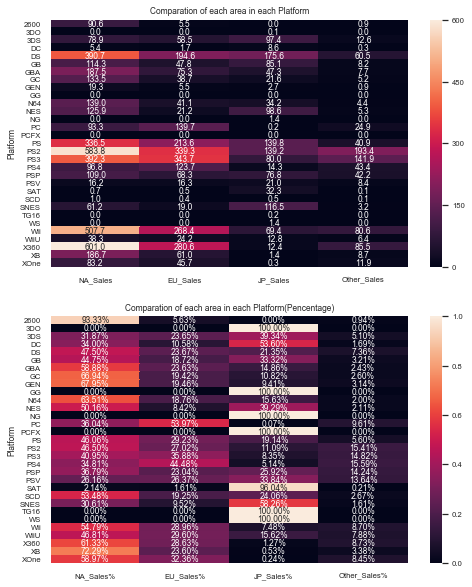

In [29]:
PlatformGroup['NA_Sales%'] = PlatformGroup['NA_Sales']/PlatformGroup['Global_Sales']
PlatformGroup['EU_Sales%'] = PlatformGroup['EU_Sales']/PlatformGroup['Global_Sales']
PlatformGroup['JP_Sales%'] = PlatformGroup['JP_Sales']/PlatformGroup['Global_Sales']
PlatformGroup['Other_Sales%'] = PlatformGroup['Other_Sales']/PlatformGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(PlatformGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Platform")
plt.subplot(212)
sns.heatmap(PlatformGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Platform(Pencentage)")
plt.show()

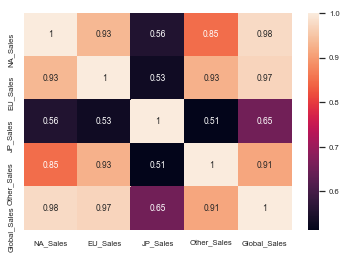

In [30]:
sns.heatmap(video_games_corr.corr(),annot = True)

Ok great, I'm finally satisfied that I understand the features of the data

I identified:
* Sales vary by year, peaking in 2008
* Different platforms are popular in different countries, but PS2 is the most popular
* There is a relationship between platform and sales over time but it is challenging to unpick without further analysis
* The most popular types of games are Action, Sports and Shooter games except for in Japan where role playing games are the most popular
* US is the largest market place
* The relationships between the features and sales are complex

Awesome! Now it's time to get onto predictions!

# Regression Analysis of Video Games data


Ok so I have had a look at all of the data I have available.

Now I want to begin making predictions on the data to understand:
* How the features of the video game impacts the sales
* Which features contribute most to accurate predictions
* Can you predict video games sales in each region and/globally based on these features

To complete this piece of work I will start by testing different regression options, starting with linear regression with different features.

I will then move on to more advanced regression analysis before trying to implement an artificial neural network.

Once I have completed my analysis I will then make a recommendation on which analysis is likely to give the most accurate future predictions. I will also summarise what I have found.

## Step 1: Linear Regression

I start with linear regression as it is the simplest implementation and it can be used to test and benchmark other more complex regressions against.

I will create 2 linear regressions representing the 4 features analysed in section 1:
* NA Sales
* Year 

Before I get onto this, I first need to fully clean my data and prepare it for analysis

In [31]:
# Data Preprocessing: 1) Remove NaN; 2) Encode Categorical Values; 3) Scale Features (if needed); 4) Train/Test Split

#How much data is missing in each column?

total = video_games_raw.isnull().sum().sort_values(ascending=False)
percent = (video_games_raw.isnull().sum()/video_games_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Year,271,0.016327
Publisher,58,0.003494
Percent_Total_Sales,0,0.000000
Global_Sales,0,0.000000
Other_Sales,0,0.000000
JP_Sales,0,0.000000
EU_Sales,0,0.000000
NA_Sales,0,0.000000
Genre,0,0.000000
Platform,0,0.000000


In [32]:
# Ok so there is missing data in year and publisher. Now let's deal with that.
# For year I am going to replace year with the average year of the column. This is to avoid having a categorical value 
# It is also so I don't loose that data from analysis. 
# Even though it does seem as though Year impacts sales, the increase in certain years seems to correspond more with
# the release of the Wii gaming platform that year itself.

video_games_training = video_games_raw

median_Year = video_games_training['Year'].median()
video_games_training['Year'].fillna(median_Year, inplace=True)


In [33]:
#Ok now to deal with Publisher. For the missing values here I will just replace with the word 'unknown'
video_games_training['Publisher'].fillna('unknown', inplace=True)

In [34]:
total = video_games_training.isnull().sum().sort_values(ascending=False)
percent = (video_games_training.isnull().sum()/video_games_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Percent_Total_Sales,0,0.0
Global_Sales,0,0.0
Other_Sales,0,0.0
JP_Sales,0,0.0
EU_Sales,0,0.0
NA_Sales,0,0.0
Publisher,0,0.0
Genre,0,0.0
Year,0,0.0
Platform,0,0.0


In [35]:
# First I will split the data into the X and Y variables - please note I have removed rank as I see rank as an output
# of the sales performance and not an input variable. I am also going to remove name.
X = video_games_training.iloc[:,2:-2]
y = video_games_training.iloc[:,-2]

In [36]:
y.head()

0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
Name: Global_Sales, dtype: float64

In [37]:
X.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


A word, before I continue, on outliers. I am aware that there are a couple of outliers in my data.

These outliers have disproportionately high sales vs the rest of the data points.

I need to decide whether or not to remove these outliers from my data.

I know that my data is not normally distributed and therefore I have chosen a MinMax scaler for feature scaling.

The issue with MinMax is that it is very sensitive to outliers. Before coming to a final decision about removing outliers from my data, I will run my experiments with Linear Regression with and without outliers to understand the impact and then make a recommendation.

In [38]:
#Now to import some libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


XNASales = X.iloc[:,-4].values
#print(XNASales)
print(XNASales.shape)

XNASales= XNASales.reshape((XNASales.shape[0], 1))
print(XNASales.shape)

(16598,)
(16598, 1)


In [39]:
# Ok now for the KFold validation
scores = []
linear_NA = LinearRegression()
cv = KFold(n_splits=5, random_state= None, shuffle=False)
for train_index, test_index in cv.split(XNASales):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = XNASales[train_index], XNASales[test_index], y[train_index], y[test_index]
    linear_NA.fit(X_train, y_train)
    scores.append(linear_NA.score(X_test, y_test))
    
print()

Train Index:  [ 3320  3321  3322 ... 16595 16596 16597] 

Test Index:  [   0    1    2 ... 3317 3318 3319]
Train Index:  [    0     1     2 ... 16595 16596 16597] 

Test Index:  [3320 3321 3322 ... 6637 6638 6639]
Train Index:  [    0     1     2 ... 16595 16596 16597] 

Test Index:  [6640 6641 6642 ... 9957 9958 9959]
Train Index:  [    0     1     2 ... 16595 16596 16597] 

Test Index:  [ 9960  9961  9962 ... 13276 13277 13278]
Train Index:  [    0     1     2 ... 13276 13277 13278] 

Test Index:  [13279 13280 13281 ... 16595 16596 16597]



In [40]:
# How did my first regression perform?
print(np.mean(scores))

from sklearn.model_selection import cross_val_score
# Simple version of above
five_fold_results = cross_val_score(linear_NA,XNASales,y,cv=5)
print(five_fold_results)

-12.664398051555
[  0.67616925  -3.47618764  -8.61418887 -17.13352847 -34.77425453]


In [41]:
# Now let's try to predict some values with X-Test

y_pred = linear_NA.predict(X_test)

abs_error_simple = mean_absolute_error(y_test,y_pred)
mse_simple = mean_squared_error(y_test,y_pred)
r_squared_simple = r2_score(y_test,y_pred)

print('Abs Error Score: ',abs_error_simple)
print('MS Error Score: ',mse_simple)
print('R^2 Error Score: ',r_squared_simple)

Abs Error Score:  0.06572810646405369
MS Error Score:  0.004703559182675392
R^2 Error Score:  -34.77425452981168


In [42]:
# Ok that is not good. It seems like we would be better using the mean data point as a prediction than this model.
# Let's repeat with the year

XYear = X.iloc[:,1].values
print(XYear)
print(XYear.shape)

XYear = XYear.reshape((XYear.shape[0], 1))
print(XYear.shape)

[2006. 1985. 2008. ... 2008. 2010. 2003.]
(16598,)
(16598, 1)


In [43]:
linear_Year = LinearRegression()
K = KFold(n_splits=5, random_state= None, shuffle=False)

from sklearn.model_selection import cross_val_score
# Simple version of above
five_fold_results = cross_val_score(linear_Year,XYear,y,cv=K)
print(five_fold_results)

[-3.61919217e-01 -6.61301596e+00 -1.46910589e+02 -8.32098572e+02
 -2.81496208e+03]


In [44]:
# Now let's try to predict some values with X-Test using the Year based regression model
scores = []
cv = KFold(n_splits=5, random_state= None, shuffle=False)
for train_index, test_index in cv.split(XYear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = XYear[train_index], XYear[test_index], y[train_index], y[test_index]
    linear_Year.fit(X_train, y_train)
    scores.append(linear_Year.score(X_test, y_test))

y_pred = linear_Year.predict(X_test)    
    
abs_error_simple = mean_absolute_error(y_test,y_pred)
mse_simple = mean_squared_error(y_test,y_pred)
r_squared_simple = r2_score(y_test,y_pred)

print('Abs Error Score: ',abs_error_simple)
print('MS Error Score: ',mse_simple)
print('R^2 Error Score: ',r_squared_simple)

Train Index:  [ 3320  3321  3322 ... 16595 16596 16597] 

Test Index:  [   0    1    2 ... 3317 3318 3319]
Train Index:  [    0     1     2 ... 16595 16596 16597] 

Test Index:  [3320 3321 3322 ... 6637 6638 6639]
Train Index:  [    0     1     2 ... 16595 16596 16597] 

Test Index:  [6640 6641 6642 ... 9957 9958 9959]
Train Index:  [    0     1     2 ... 16595 16596 16597] 

Test Index:  [ 9960  9961  9962 ... 13276 13277 13278]
Train Index:  [    0     1     2 ... 13276 13277 13278] 

Test Index:  [13279 13280 13281 ... 16595 16596 16597]
Abs Error Score:  0.6039967453442456
MS Error Score:  0.37023956092496413
R^2 Error Score:  -2814.962077892168


In [45]:
# OK this is not going well - let's give it a go with all the input variables
# Now with all variables
# First I want to encode my categorical data values so that I can use my algorithms on the dataset
# To do this I will use get_dummys

X1 = pd.get_dummies(X, prefix_sep='_', drop_first=True)

X1.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Publisher_unknown
0,2006.0,41.49,29.02,3.77,8.46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,0.77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.85,12.88,3.79,3.31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.75,11.01,3.28,2.96,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,1.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Now I will scale everything using the MinMaxScaler as I do not have a guassian distribution

scaler = MinMaxScaler(feature_range=(0, 1))
X1 = scaler.fit_transform(X1)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
# PCA analysis
# There are 624 columns in X1. This means the regression will look at 624 input variables. It is likely not all of
# these variables are significant therefore I will perform PCA to get a simpler representation of the data.

from sklearn.decomposition import PCA

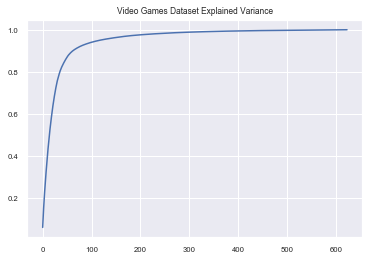

In [48]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X1)
#Plotting the Cumulative Summation of the Explained Variance to determine how many components to include.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Video Games Dataset Explained Variance')
plt.show()

Ok, I can see from my PCA plot that after ~205 inputs I don't gain significant benefit in terms of the accuracy or completion of my model for me to include them.

Therefore, when I run my multi-variable linear analysis, I am going to keep the number of components to the 200 identified by the PCA model.

This should help my model run faster whilst improving the accuracy from my simple models.

In [49]:
# Because of the size of the inputs I am going to start with a simple train, test split then reduce inputs
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

#Applying PCA
pca = PCA(n_components = 205)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)
explained_variance = pca.explained_variance_ratio_

In [50]:
# Now I will implement multi-variable linear regression
# Let's try to predict some values with X-Test using a regression model with all inputs.

regressor = LinearRegression()
regressor.fit(X_train1, y_train) 

y_pred = regressor.predict(X_test1)
    
abs_error_simple = mean_absolute_error(y_test,y_pred)
mse_simple = mean_squared_error(y_test,y_pred)
r_squared_simple = r2_score(y_test,y_pred)

print('Abs Error Score: ',abs_error_simple)
print('MS Error Score: ',mse_simple)
print('R^2 Error Score: ',r_squared_simple)

Abs Error Score:  0.20857422148472765
MS Error Score:  0.23155295674699047
R^2 Error Score:  0.8965788360905271


In [51]:
#TODO: Create plot of top 10 most contributing components to the sales

Wow this is awesome! I have created a model now which has a low error score and an R^2 value close to 90%! What an improvement on before.

I have also managed to identify the top 10 contributing factors to a Games Success. Good stuff.

I wonder if i can make it better though....

In [52]:
# Plotting the Least Squares Line

# sns.pairplot(data, x_vars=['NA_Sales','Year','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [53]:
# Before I move on I just want to understand the impact of outliers on my predictions.
# Now let's repeat PCA MVLR analysis of all variables but first removing outliers
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)
  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

no_outlier_video_game = remove_outlier(video_games_training,"Global_Sales")

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


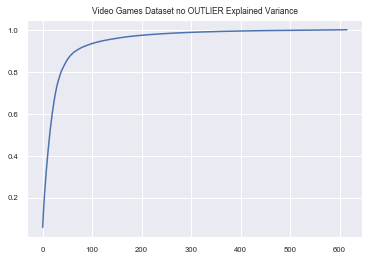

In [54]:
# OK now I can make a recommendation on outliers and on benchmarks
XO = no_outlier_video_game.iloc[:,2:-2]
yO = no_outlier_video_game.iloc[:,-2]

XO = pd.get_dummies(XO, prefix_sep='_', drop_first=True)
scaler = MinMaxScaler(feature_range=(0, 1))
XO = scaler.fit_transform(XO)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(XO)
#Plotting the Cumulative Summation of the Explained Variance to determine how many components to include.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Video Games Dataset no OUTLIER Explained Variance')
plt.show()

In [55]:
# Because of the size of the inputs I am going to start with a simple train, test split then reduce inputs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XO, yO, test_size = 0.2, random_state = 0)

#Applying PCA
pca = PCA(n_components = 205)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [56]:
# Now I will implement multi-variable linear regression
# Let's try to predict some values with X-Test using a regression model with all inputs.

regressor = LinearRegression()
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)
    
abs_error_simple = mean_absolute_error(y_test,y_pred)
mse_simple = mean_squared_error(y_test,y_pred)
r_squared_simple = r2_score(y_test,y_pred)

print('Abs Error Score: ',abs_error_simple)
print('MS Error Score: ',mse_simple)
print('R^2 Error Score: ',r_squared_simple)

Abs Error Score:  0.0032292123455497394
MS Error Score:  2.772556196570119e-05
R^2 Error Score:  0.9995343138739673


In [ ]:
#TODO: Create plot of top 10 most contributing components to the sales
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

Ok that is super interesting. I can see from this analysis that when I remove the outliers my results get much more accurate. However, is removing the outliers ultimately a mistake?

I know from my earlier visualisations that the biggest outliers in the data relate to games released on the Wii when it launched in the late 2000s. I remember when this game launched that there was a lot of media hype and it was around Christmas. A lot of people got this new console along with the games as a Christmas gift. 

This is a real phenomenon in the data that could happen again when a new console launched. Though it is an outlier here and therefore can impact the overall accuracy of predictions, it is worth understanding how events like this can impact overall sales.

As an experienced analyst in the ecommerce space my recommendation to a client looking to use this data for sales forecasting would be as follows. 

Essentially you have three options:
1) Use the second model (removing outliers for predicted sales) - the risk here is that you could miss out on unexpected high sales games not accounted for

2) Create a 2 model approach - 1 for day to day sales forecasting and one for games associated with major console launches or other such events

3) Look to incorporate additional features (not given in this dataset) such as marketing spend, timing of release - basically some factors that contribute to 'hype' to create a more robust model capable of understanding these impacts on sales forecasts.

Of these three options, number 3 would be my preferred assuming the data can be accessed.

Before I conclude this project however, I want to try out a couple of other model types to see if they can beat the predictions of the model without outliers.

The model types I will test are SVR and Random Forest.

In [58]:
# SVM
# Because SVR models need encoded categorical variables I am going to repeat my PCA process to reduce the number of 
# features from 624 to 205. This is to ensure the algorithm can run efficiently and remove noice from certain features
# As I have already computed the X Train with the PCA features I will not repeat it.

X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

#Applying PCA
pca = PCA(n_components = 205)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)
explained_variance = pca.explained_variance_ratio_

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

svr_rbf.fit(X_train1, y_train) 
y_pred_rbf = svr_rbf.predict(X_test1)

svr_lin.fit(X_train1, y_train) 
y_pred_lin = svr_lin.predict(X_test1)

svr_poly.fit(X_train1, y_train) 
y_pred_poly = svr_poly.predict(X_test1)
    
abs_error_simple_rbf = mean_absolute_error(y_test,y_pred_rbf)
mse_simple_rbf = mean_squared_error(y_test,y_pred_rbf)
r_squared_simple_rbf = r2_score(y_test,y_pred_rbf)

abs_error_simple_lin = mean_absolute_error(y_test,y_pred_lin)
mse_simple_lin = mean_squared_error(y_test,y_pred_lin)
r_squared_simple_lin = r2_score(y_test,y_pred_lin)

abs_error_simple_poly = mean_absolute_error(y_test,y_pred_poly)
mse_simple_poly = mean_squared_error(y_test,y_pred_poly)
r_squared_simple_poly = r2_score(y_test,y_pred_poly)


print('Abs Error Score: 1)',abs_error_simple_rbf,' 2)',abs_error_simple_lin,' 3)',abs_error_simple_poly)
print('MS Error Score:  1)',mse_simple_rbf,' 2)',mse_simple_lin,' 3)',mse_simple_poly)
print('R^2 Error Score: 1)',r_squared_simple_rbf,' 2)',r_squared_simple_lin,' 3)',r_squared_simple_poly)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Abs Error Score: 1) 0.42254933004118844  2) 0.20754650954069834  3) 0.4739419838358802
MS Error Score:  1) 2.068116582711919  2) 0.3416418078068436  3) 2.355539940606802
R^2 Error Score: 1) 0.07629327178812584  2) 0.8474085846283221  3) -0.052081932855613244


So the best performing SVR was the one with the linear kernel. I included outliers in this analysis and the result was on par with linear regression however not quite as accurate when it came to the error scores.

Before concluding on regression I just want to try Random forest analysis.

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=2, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=3, scoring='neg_mean_absolute_error')

    return scores

rfr_model(X1,y)

array([-1.07377073, -0.1893274 , -0.16447765])

# Conclusion Pt. 1

Based on the analyses I have done I have identified the best performing regression model to be....

multi-variable linear regression with PCA! Closely followed by SVR!